<a href="https://colab.research.google.com/github/LPRJ0/Ciencias/blob/main/Charac_funcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función característica

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.


**Autores del texto: Josué Manik Nava Sedeño y María Clara Fittipaldi. Autores del material interactivo: Ariadna Margarita Vargas Bautista y Abraham Martínez López. Facultad de Ciencias, UNAM, 2021. 
Contacto con los responsables del proyecto: manikns@ciencias.unam.mx mcfittipaldi@ciencias.unam.mx**

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE102121 "Recursos para el aprendizaje de la Transformada de Fourier y su interpretación como la Función Característica de una distribución de probabilidad".

**Importante:** En caso de que, al ejecutar el recurso, aparezca algún mensaje de advertencia, favor de seleccionar "Ejecutar de todos modos''.

Empezamos importando librerías necesarias para el funcionamiento del cuaderno.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML, Image


In [ ]:
from sympy import *
from sympy.stats import *

In [ ]:
import numpy as np

Dado un *espacio de probabilidad* $(\Omega,\mathcal{F},P)$,  se pueden definir funciones que describen los eventos del espacio original como eventos en $\mathbb{R}$, permitiendonos usar así toda la teoría matemática conocida en este espacio. Llamamos *variable aleatoria* a una función de la forma $X:\Omega\rightarrow\mathbb{R}$ tal que $X^{-1}(B)=\{\omega \in \Omega: X(\omega) \in B\} \in \mathcal{F}$ para todo $B \in \mathcal{B}$, dónde $\mathcal{B}$ corresponde a la $\sigma$-álgebra de los borelianos en $\mathbb{R}$. Podemos definir entonces la *distribución de probabilidad*  $P_X$ asociada a la variable $X$, que corresponde a la probabilidad inducida $P_X(B)=P(X^{-1}(B))$ para todo $B \in \mathcal{B}$, que denotaremos simplemente como $P(X \in B)$. En general, esta distribución puede caracterizarse por la *Función de Distribución Acumulada* (FDA) $F_X: \mathbb{R} \rightarrow [0,1]$, dada por
$$F_X(z)=P(X \in (-\infty,z])=P(X \leq z), \qquad z \in \mathbb{R}.$$
Si $X$ es una *variable aleatoria discreta*, $P_X$ puede definirse también a partir de una *función de probabilidad puntual* $p_X$, que toma a lo más una cantidad numerable de valores no nulos, y satisface que  $P(X \in B)=\sum\limits_{k \in B}p_X(k)$ para todo $B \in \mathcal{B}$, y en particular
$F_X(z)=\sum\limits_{k\leq z}p_X(k)$ para todo $z \in \mathbb{R}$.

En el caso que $X$ es una *variable aleatoria continua*, $P_X$ puede definirse a partir de una *densidad de probabilidad* $f_X:\mathbb{R} \rightarrow [0,1]$, donde $P(X \in B)=\int_{B}f_X(u) du$ para todo $B \in \mathcal{B}$, y en particular $F_X(z)=\int_{-\infty}^{z}f_X(u)du$ para todo $z\in \mathbb{R}$.



Como ya sabemos, a partir de conceptos fundamentales vistos en **Probabilidad I**, podríamos estar interesados en ciertos valores constantes observables de una distribución de probabilidad, como podrían ser su esperanza o su varianza, pero podemos también estudiar ciertas funciones reales que nos ayudan a estudiar (y caracterizar) una cierta distribución. Dada una variable aleatoria $X:\Omega \rightarrow \mathbb{R}$, la *función característica* de $X$  es una función $\varphi_X: \mathbb{R} \rightarrow \mathbb{C}$ dada por  
$$	\varphi_X(t)=E\left[e^{itX}\right]=E\left[\cos(tX)\right]+ iE\left[\sin(tX)\right], \quad \forall t \in \mathbb{R}.$$
Si $X$ es una v.a. discreta, la función característica es la transformada de Fourier discreta de la función de probabilidad puntual $p_X$, es decir
$$\varphi_X(t)=\sum\limits_{k \in \mathcal{R}_X}e^{itk}p_X(k);$$ y si $X$ es una v.a. continua entonces 
$$	\varphi_X(t)=\int_{-\infty}^{\infty}e^{itx}f(x)dx,$$ 
es decir la función característica corresponde a la Transformada de Fourier de la función de densidad $f$. En ambos casos $\varphi_X$ es una función continua en $t$.

Es fácil probar que se satisfacen las siguientes propiedades.

 $(i)  \qquad |\varphi_X(t)|=|E[e^{itX}]|\leq E\left[|e^{itX}|\right]=E[\sqrt{\cos^2(tX)+\sin^2(tX)}]=1,$ 
 lo que implica que la función característica está definida para todo $t \in \mathbb{R}$, sin importar la distribución de $X$.

 $(ii) \qquad \varphi_X(0)= E[\cos(0X)]+iE[\sin(0X)]=1$.
		
 $(iii)$ Dado $a,b \in \mathbb{R}$, 
 $$\varphi_{aX+b}(t)=E\left[e^{itaX}e^{itb}\right]=e^{itb}E[e^{i(at)X}]=e^{itb}\varphi_X(at).$$
		
Es posible probar que una función y su correspondiente transformada de Fourier tiene una relación uno a uno, por lo que su función inversa está bien definida. Esto permite probar el siguiente resultado, que asegura que es posible reconstruir la función de distribución acumulada (FDA) de una variable aleatoria a partir de la función característica. No incluimos su demostración debido a que es técnicamente difícil y excede los objetivos de este recurso, pero ésta puede consultarse [aquí](https://lya.fciencias.unam.mx/lars/flip-cip/mobile/index.html) (Sección 8.3).

**Fórmula de Inversión de Lévy.** Dados $x,y \in \mathbb{R}$ dos puntos de continuidad de la FDA $F_X(\cdot)=P(X<\cdot)$, con $x<y$, tenemos que
$$P\left(x<X\leq y\right)=F_X(y)-F_X(x)=\dfrac{1}{2\pi}\lim\limits_{T\rightarrow\infty}\int\limits_{-T}^T \dfrac{e^{-itx}-e^{-ity}}{it}\varphi_X(t)dt.$$ 
En particular, si la variable aleatoria $X$ toma valores naturales, entonces
$$P(X=k)=\dfrac{1}{2\pi}\int_{-\pi}^\pi e^{-itk}\varphi_X(t)dt \quad \forall k \in \mathbb{N}.$$

Usando la Fórmula de Inversión, podemos probar la siguiente proposición, que establece que la *función  característica determina la distribución*.

**Proposición.** Dadas $X$ e $Y$ variables aleatorias tales que $\varphi_X(t)=\varphi_Y(t)$ $\forall t \in \mathbb{R}$, entonces $X \overset{\mathcal{D}}{=} Y$.

**Demostración.** Por la Fórmula de Inversión tenemos que, para cada $z \in \mathbb{R}$,
$$\begin{aligned}
	F_x(z)&=\lim\limits_{y_n \downarrow z}\lim_{x_n \downarrow -\infty}\lim\limits_{T\rightarrow \infty}\dfrac{1}{2\pi}\int_{-T}^T \dfrac{e^{-itx_n}-e^{-ity_n}}{it}\varphi_{X}(t)dt=\lim\limits_{y_n \downarrow z}\lim_{x_n \downarrow -\infty}\lim\limits_{T\rightarrow \infty}\dfrac{1}{2\pi}\int_{-T}^T \dfrac{e^{-itx_n}-e^{-ity_n}}{it}\varphi_{Y}(t)dt=F_Y(z),
	\end{aligned}$$ donde $\{y_n\}_{n \in \mathbb{N}}$ es una sucesión decreciente de puntos de continuidad de $F_X$ que converge a $z$ y $\{x_n\}_{n\in \mathbb{N}}$ es una sucesión decreciente de puntos de continuidad que va a $-\infty$  (siempre existen pues una FDA tiene a lo más una cantidad numerable de puntos de discontinuidad). 
	Entonces, como $F_X(z)=F_Y(z)$ $\forall z\in \mathbb{R}$, tenemos que $X$ e $Y$ tienen la misma distribución.

Podemos estudiar la convergencia en distribución de una sucesión de variables aleatorias $\{X_n\}_{n \in \mathbb{N}}
$, definida como
$$X_n \overset{\mathcal{D}}{\longrightarrow}X \qquad \Longleftrightarrow \qquad  F_{X_n}(z)=P\left(X_n \leq z\right)\rightarrow F_X(z)=P\left(X \leq z\right) \quad \forall z \in \mathbb{R}: F(z)=\lim\limits_{z_n\rightarrow z}F(z_n),$$  usando la convergencia de sus funciones características.

**Teorema de Continuidad de Paul Lévy.** Sean $\{X_n\}_{n \in \mathbb{N}}$, $X$ variables aleatorias. Entonces
$$X_n \overset{\mathcal{D}}{\longrightarrow}X \qquad \iff \qquad \varphi_{X_n}(t) \rightarrow \varphi_{X}(t) \quad \forall t \in \mathbb{R}.$$

**Demostración**
$(\Rightarrow)$ Supongamos que $X_n \overset{\mathcal{D}}{\longrightarrow}X$. Tenemos entonces que $E\left[f(X_n)\right] \rightarrow E\left[f(X)\right]$ para toda función $f$ continua y acotada. En particular las funciones seno y coseno son continuas y acotadas, por lo que para cada $t \in \mathbb{R}$ tenemos que
$$\lim\limits_{n\rightarrow \infty}\varphi_{X_n}(t)=\lim\limits_{n\rightarrow \infty}E[\cos(tX_n)]+i\lim\limits_{n\rightarrow \infty}E[\sin(tX_n)]=E[\cos(tX)]+iE[\sin(tX)]=\varphi_{X}(t).$$
		
$(\Leftarrow)$ Sean $x,y \in \mathbb{R}$ puntos de continuidad de $F_X$, con $x\geq y$. Entonces tenemos que
$$\begin{aligned}
		F_X(y)-F_X(x)&= \lim\limits_{T\rightarrow \infty}\dfrac{1}{2\pi}\int_{-T}^{T} \dfrac{e^{-itx}- e^{-ity}}{it}\varphi_{X}(t)dt
		=   \lim\limits_{T\rightarrow \infty}\dfrac{1}{2\pi}\int_{-T}^{T} \dfrac{e^{-itx}- e^{-ity}}{it}\left[\lim\limits_{n\rightarrow \infty}\varphi_{X_n}(t)\right]dt\\
		&= \lim\limits_{n\rightarrow \infty}\left[\lim\limits_{T\rightarrow \infty}\dfrac{1}{2\pi}\int_{-T}^{T} \dfrac{e^{-itx}- e^{-ity}}{it}\varphi_{X_n}(t)dt\right]
		=\lim\limits_{n\rightarrow \infty}\left[F_n(y)-F_n(x)\right],
		\end{aligned}$$
		y puedo intercambiar los límites pues ambos existen y son finitos por convergencia y Fórmula de Inversión. Por lo tanto, basta tomar una sucesión decreciente $\{x_n\}_{n\in \mathbb{N}}$  de puntos de continuidad de $F_X$ que se vaya a $-\infty$ para obtener la convergencia deseada.

**Proposición.** Si $X$ es una variable aleatoria tal que $E[|X|^n] \leq \infty$, entonces

$(i) \qquad \varphi^{(k)}_{X}(t)\Big|_{t=0}=i^n E\left[X^k\right], \quad \forall k \in \{1,2,...,n\}$. 

$(ii) \qquad \varphi_{X}(t)=\sum\limits_{k=0}^n \dfrac{E[X^k]}{k!}(it)^k + o(t^n)$, con $\lim\limits_{t \rightarrow 0}\frac{o(t^n)}{t^n}=0.$

**Demostración.** Recordemos que $\varphi_{X}(t)= E[\cos (tX)]+iE[\sin (tX)]$, y como ambas funciones son acotadas (y sus derivadas también), tenemos que la derivada de la esperanza es la esperanza de la derivada, por lo que 
$$\varphi'_{X}(t)\Big|_{t=0}= E[X . -\sin (tX)]+iE[X . \cos (tX)]\Big|_{t=0}=iE[X],$$ siempre y cuando la esperanza sea finita. Podemos realizar esta operación de manera iterada mientras los momentos estén bien definidos, obteniendo así las derivadas deseadas. Para deducir el ítem $(ii)$ basta aplicar el Teorema de Taylor para la exponencial compleja. 




A continuación visualizamos las funciones características asociadas a algunas distribuciones conocidas. vemos que las funciones característica son funciones simétricas con respecto al eje real. Esto es consecuencia de que la función característica sea la esperanza de la exponencial compleja $e^{itX}$, la cual es simétrica respecto al eje real.

# Distribución Normal

Sea $X$ una variable aleatoria con distribución $\mathcal{N}(\mu,\sigma)$, es decir que tiene función de densidad dada por 
$$f_{X}(z)=\tfrac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{(z-\mu)^2}{2\sigma^2}}, \qquad z \in \mathbb{R}.$$
La función característica de $X$ está dada por 
$$\phi_X(t)=e^{it\mu-\frac{1}{2}\left(t\sigma\right)^2}=e^{-\frac{1}{2}\left(t\sigma\right)^2}e^{it\mu}, \qquad t \in \mathbb{R}.$$ 
 Notemos que la primera exponencial es puramente real, y la segunda tiene un exponente puramente complejo. Comparando esta expresión con la forma polar de los números complejos, podemos ver que para los puntos de la curva, el argumento y el módulo están dados por
 $$\theta=\mu t, \qquad \text{ y } \qquad  r=e^{-\frac{1}{2}\left(t\sigma\right)^2}.$$
Es decir, mientras $t$ crece, la curva debe rotar a la izquierda (pues el ángulo respecto al eje real también crece), pero mientras $|t|$ crece, el módulo debe decaer exponencialmente. Una curva cuyo radio decrece con el ángulo es una espiral. Esto puede apreciarse a continuación. Cuando tomamos sólo una rama ($t$ positivas o negativas) se aprecia más fácilmente el comportamiento espiral. Tomando ambas ramas tenemos una superposición de espirales simétricas alrededor del eje real.


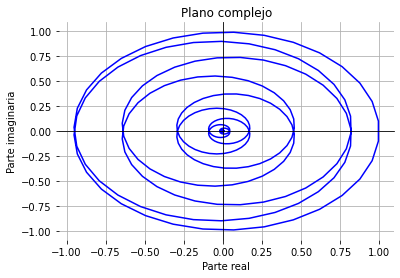

In [ ]:
μ = Symbol('\mu', real=True, bounded=True)
σ = Symbol('\sigma', positive=True, real=True, bounded=True)
x = Symbol('x', real=True)
X = Normal('X', μ, σ)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambdify(t,cf.subs(μ,10).subs(σ,1),'numpy')

fig, ax = plt.subplots()
ax.plot(ϕ(np.linspace(-20,20,2000)).real,
        ϕ(np.linspace(-20,20,2000)).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Bernoulli

Sea $X$ una variable aleatoria con distribución $\mathrm{Bernoulli}(p)$ con función de probabilidad
$$p(z)=\left\{
\begin{array}{cc}
 p \qquad &\mbox{ si } z=1\\
 1-p \qquad &\mbox{ si } z=0
\end{array}
\right.,$$
y función característica dada por
$$\phi_X(t)=1-p+pe^{it}, \qquad t \in \mathbb{R},$$
que visualizamos a continuación.

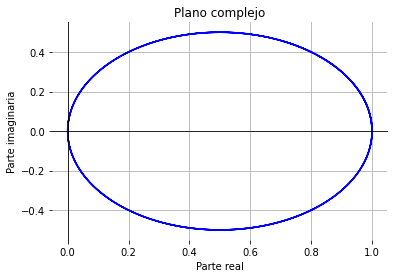

In [ ]:
p = Symbol('p',positive=True,bounded=True)
x = Symbol('x', real=True)
X = Bernoulli('X', p)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambdify(t,cf.subs(p,0.5),'numpy')

fig, ax = plt.subplots()
ax.plot(ϕ(np.linspace(0,20,1000)).real,
        ϕ(np.linspace(0,20,1000)).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Binomial

Sea X una variable aleatoria con distribución $\mathrm{Binomial}(n,p)$, con función de probabilidad dada por
$$p(k)={n \choose k} p^k(1-p)^{n-k}.$$
Su función característica es de la forma
$$\phi_X(t)=(1-p+pe^{it})^n,$$
que visualizamos a continuación.

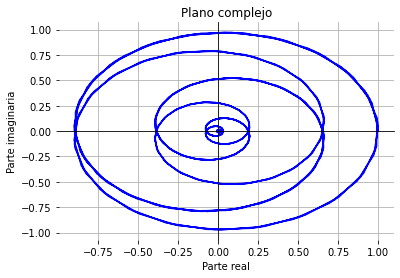

In [ ]:
p = Symbol('p',positive=True,bounded=True)
n = Symbol('n', integer=True, positive=True)
x = Symbol('x', real=True)
X = Bernoulli('X', p)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X))**n)

ϕ=lambdify(t,cf.subs([(p,0.7),(n,20)]),'numpy')

fig, ax = plt.subplots()
ax.plot(ϕ(np.linspace(0,20,1000)).real,
        ϕ(np.linspace(0,20,1000)).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# BetaBinomial

Sea $X$ una variable aleatoria $\mathrm{BetaBinomial}(n,\alpha,\beta)$, con función de probabilidad puntual
$$f_{X}(k)={n \choose k}\frac{\mathrm{B}(\alpha+k,\beta+n-k)}{\mathrm{B}(\alpha,\beta)}, \qquad k \in \{0,1,\dots,n\}.$$
donde  $\mathrm{B}(a,b )$ es la función *beta* y se define para $a , b > 0$ como
$$\mathrm{B}(a,b ) = \int_0^1 x^{a-1}(1 -x)^{\beta - 1} d x .$$

Su función característica esta dada entonces por la serie 
$$\phi_X(t)=\sum\limits_{k=0}^n {n \choose k} e^{kit}\frac{\mathrm{B}(\alpha+k,\beta+n-k)}{\mathrm{B}(\alpha,\beta)}, \qquad t \in \mathbb{R},$$ que visualizamos a continuación.

**Dada la cantidad de sumas involucradas en la expresión de la función característica, y la presencia de funciones especiales, la siguiente gráfica puede tardar más de cinco minutos en generarse.**

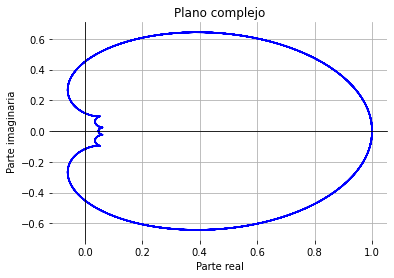

In [ ]:
n = Symbol('n',integral=True,bounded=True)
α = Symbol('\\alpha',positive=True,bounded=True)
β = Symbol('\\beta',positive=True,bounded=True)
x = Symbol('x', integral=True)
X = BetaBinomial('X', n, α, β)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambda s: complex(cf.subs(n,5).subs(α,2).subs(β,3).subs(t,s).evalf())

fig, ax = plt.subplots()
ax.plot(
    np.array([ϕ(s) for s in np.linspace(-20,20,2000)]).real,
    np.array([ϕ(s) for s in np.linspace(-20,20,2000)]).imag,
    'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Hiper-geométrica

Sea $X$ una variable aleatoria con distribución $\mathrm{Hipergeom}(N,m,n)$, con funcion de probabilidad puntual
$$p(x)=\frac{{m \choose x}{N-m \choose n-x}}{{N\choose n}}, \qquad 	\max\{0 , n - N + m \} \leq x \leq \min \{ m , N - m \}.$$

Su función característica está dada por
$$\phi(t)=\sum\limits_{k=0}^n e^{kit}\frac{{m \choose x}{N-m \choose n-x}}{{N\choose n}}, \qquad t \in \mathbb{R},$$
que visualizamos a continuación.

**Dada la cantidad de sumas involucradas en la expresión de la función característica, la siguiente gráfica puede tardar más de treinta segundos en generarse.**

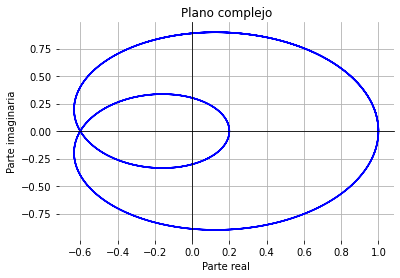

In [ ]:
N = Symbol('N',integral=True,bounded=True)
m = Symbol('m',integral=True,bounded=True)
n = Symbol('n',integral=True,bounded=True)
x = Symbol('x', integral=True)
X = Hypergeometric('X', N, m, n)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambda s: complex(cf.subs(N,5).subs(m,4).subs(n,2).subs(t,s).evalf())

fig, ax = plt.subplots()
ax.plot(
    np.array([ϕ(s) for s in np.linspace(0,20,1000)]).real,
    np.array([ϕ(s) for s in np.linspace(0,20,1000)]).imag,
    'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Arcoseno

Sea $X$ una variable con distribución arcoseno, es decir con función de densidad dada por
$$f_X(u)=\frac{1}{\sqrt{x(1-x)}}, \qquad x \in (0,1).$$
Visualizamos a continuación su función característica, dada por
$$\phi_X(t)=\int_0^1 \frac{e^{uit}}{\sqrt{u(1-u)}}du.$$

**Dada las operaciones involucradas en la expresión de la función característica, la siguiente gráfica puede tardar más de quince minutos en generarse.**

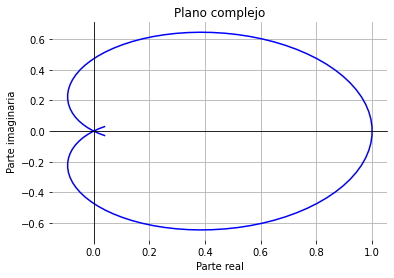

In [ ]:
X = Arcsin('X')
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambda s: complex(cf.subs(t,s).evalf())

fig, ax = plt.subplots()
ax.plot(
    np.array([ϕ(s) for s in np.linspace(-5,5,100)]).real,
    np.array([ϕ(s) for s in np.linspace(-5,5,100)]).imag,
    'b-')
ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Beta
Sea $X$ una variable aleatoria con distribución $\mathrm{Beta}(\alpha,\beta)$, con función de densidad
$$f_X(z)= \frac{z^{\alpha - 1}(1-z)^{\beta - 1}}{B(\alpha,\beta)}, \qquad z \in [0,1].$$
Su función característica está dada por
$$\phi_X(t)=\int_0^1 e^{zit}\frac{z^{\alpha - 1}(1-z)^{\beta - 1}}{B(\alpha,\beta)} dz, \qquad t \in \mathbb{R},$$
y la visualizamos a continuación.

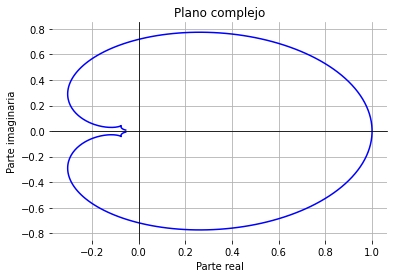

In [ ]:
X = Beta('X', alpha=2, beta=3)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambda s: complex(cf.subs(t,s).evalf())

fig, ax = plt.subplots()
ax.plot(
    np.array([ϕ(s) for s in np.linspace(-15,15,400)]).real,
    np.array([ϕ(s) for s in np.linspace(-15,15,400)]).imag,
    'b-')
ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Exponencial

Una variable aleatoria $X$ tiene distribución $\mathrm{Exp}(\lambda)$ si su función de densidad es de la forma
$$f(x)=\lambda e^{-x\lambda}, \qquad x \geq 0.$$
Podemos calcular su función característica, que toma la forma
$$\varphi_X(t)= (1-\tfrac{it}{\lambda})^{-1}, \qquad t\in \mathbb{R},$$
que visualizamos a continuación.

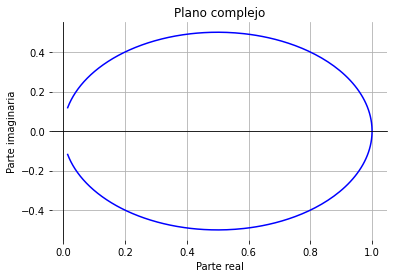

In [ ]:
X = Exponential('X', rate=3)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambdify(t,cf,'numpy')

fig, ax = plt.subplots()
ax.plot(ϕ(np.linspace(-25,25,1000)).real,
        ϕ(np.linspace(-25,25,1000)).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Distribución Cauchy

La fortaleza de la función característica recae en estar definida para cualquier valor real, pues siempre está 
acotada, aun el caso en distribuciones más complicadas, como por ejemplo para el caso de la distribución de Cauchy.
Una variable aleatoria tiene distribución $\mathrm{Cauchy}(x_0, \gamma)$ si tiene densidad
$$f(x)=\tfrac{1}{\pi\gamma \left[1+\left(\tfrac{x-x_0}{\gamma}\right)^2\right]}, x \in \mathbb{R}$$
 Sabemos que los momentos de la distribución de Cauchy no están determinados o son infinitos. Dado que los momentos corresponden a los valores de las derivadas de la función característica en $t=0$, deberíamos poder identificar esta propiedad de la distribución de Cauchy (y en general, de cualquier distribución sin momentos definidos) a partir de su función característica. Aunque podríamos identificar esto directamente evaluando en la función característica y sus derivadas en $t=0$, queda muy claro al momento de visualizarlo,  ya que la falta de momentos (finitos o definidos) se traduce en un pico no diferenciable cerca del punto $(1,0)$ en el plano complejo.


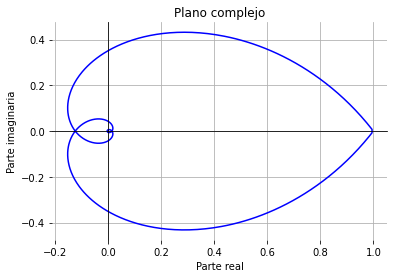

In [ ]:
X = Cauchy('X', x0=3, gamma=2)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

x0=3
gamma=2
ϕ=lambda t: np.exp(x0*1j*t-gamma*np.abs(t))

fig, ax = plt.subplots()
ax.plot(ϕ(np.linspace(-25,25,10000)).real,
        ϕ(np.linspace(-25,25,10000)).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Suma de Variables aleatorias

Dadas $X$ e $Y$ variables aleatorias independientes, tenemos la siguiente fórmula para la función característica
$$\varphi_{X+Y}(t)=\varphi_X(t)\varphi_Y(t).$$
En efecto,
$$\begin{aligned}
		\varphi_{X+Y}(t)& =E\left[(\cos(tX) + i\sin(tX))(\cos(tY)+i\sin(tY))\right]\\
		& =E\left[\cos(tX)\right]E\left[\cos(tY)\right]+iE\left[\cos(tX)\right]E\left[\sin(tY)\right]+iE\left[\sin(tX)\right]E\left[\cos(tY)\right]-E\left[\sin(tX)\right]E\left[\sin(tY)\right]\\
        & =E\left[(\cos(tX) + i\sin(tX))\right]E\left[(\cos(tY)+i\sin(tY))\right]\\
		& =\varphi_X(t)\varphi_Y(t).
		\end{aligned}$$	

En general, dadas $X_1,X_2,\cdots,X_n$ variables aleatorias independientes, se cumple		
$$\varphi_{\sum\limits_{i=1}^n X_i}(t)= \prod\limits_{i=1}^{n} \varphi_{X_i}(t) \quad \forall t\in \mathbb{R}.$$

Un resultado muy relevante en la Teoría de Probabilidad Clásica es el siguiente, que establece que si realizo el mismo experimento aleatorio muchas veces, de manera idéntica e independiente, la media muestral se acerca a la media matemática de su distribución.

**Ley débil de los Grandes Números.** Sea $\{X_n\}_{n \in \mathbb{N}}$ una sucesión de vs. as. definidas en el mismo espacio,  independientes y con $E[X_n]=\mu$, $\mathrm{Var}(X_n)=\sigma^2$ para todo $n \in \mathbb{N}$. Tenemos entonces que
$$\overline{X}_n:=\sum\limits_{i=1}^n\frac{X_n}{n} \overset{P}{\rightarrow} \mu \quad \Longleftrightarrow \quad 
	\forall \varepsilon>0, \quad \lim\limits_{n \rightarrow \infty}P\left(|\overline{X}_n - \mu|\right)=0$$

**Demostración.** Para poder probar la convergencia en probabilidad, usaremos la desigualdad de Tchebyshev, que establece que dada $X$ una variable aleatoria con $\mathrm{Var}[X]<\infty$, tenemos que
$$P\left(|X-E[X]|\geq \varepsilon\right)\leq \dfrac{\mathrm{Var}(X)}{\varepsilon^2}.$$ 
Para aplicar esta desigualdad, calculemos la esperanza y varianza de $\overline{X}_n$.
$$E\left[\overline{X}_n\right]=\sum\limits_{i=1}^n\frac{E[X_n]}{n}=\mu \quad \mbox{y} \quad 
	\mathrm{Var}\left(\overline{X}_n\right)=\sum\limits_{i=1}^n\frac{\mathrm{Var}(X_n)}{n^2}=\frac{\sigma^2}{n}, $$
usando la independencia de las variables. Entonces dado $\varepsilon>0$, por la desigualdad de Tchebyshev tenemos que
$$P\left(|\overline{X}_n - \mu|\right)\leq \frac{\mathrm{Var}(\overline{X}_n)}{\varepsilon^2}=\frac{\sigma^2}{n\varepsilon^2},$$ por lo que tomando el límite cuando $n$ tiende a infinito obtenemos el resultado deseado.

 Dada una sucesión de variables aleatorias $\{X_n\}_{n\in \mathbb{N}}$ i.i.d, el resultado anterior implica que sus medias muestrales $\bar{X}_n=\tfrac{\sum\limits_{k=1}^n X_k}{n}$ convergen en distribución a $\mu=E[X_1]$ cuando $n$ tiende a infinito. Nos preguntamos ¿cuál es la velocidad de dicha convergencia? o, en otras palabras, ¿cuál es el orden de las variables $\bar{X}_n - \mu$?. Sabemos que $\bar{X}_n - \mu \overset{\mathcal{D}}{\longrightarrow}0$, pero que ¿pasa con $\frac{\bar{X}_n - \mu}{f(n)}$ para alguna función $f$ conveniente?

Primero calculemos la varianza 
$$\mathrm{Var}\left[\bar{X}_n - \mu\right]=\mathrm{Var}\left[\bar{X}_n\right]=\frac{\sigma^2}{n}.$$
Entonces, si $\bar{X}_n - \mu$ por su desviación estándar, y definimos 
$$Z_n:=\tfrac{\bar{X}_n - \mu}{\sigma/\sqrt{n}}=\tfrac{\sqrt{n}\left(\bar{X}_n - \mu\right)}{\sigma},$$ se tiene que $E[Z_n]=0$ y $\mathrm{Var}[Z_n]=1$. ¿La sucesión de variables aleatorias $\{Z_n\}_{n \in \mathbb{N}}$ tiene límite? Si, como afirma el siguiente resultado.

**Teorema Central del Límite.** Dada $\{X_n\}_{n \in \mathbb{N}}$ una sucesión de vs. as. i.i.d. con media $\mu$ y varianza $\sigma^2$, con $0<\sigma^2<\infty$, sea $\{Z_n\}_{n\in \mathbb{N}}$ la sucesión de sumas normalizadas asociada, dadas por 
$$	Z_n:=\frac{\tfrac{\sum\limits_{k=1}^n X_k}{n} - \mu}{\sigma/\sqrt{n}}=\frac{\left(\sum\limits_{k=1}^n X_k - n\mu\right)}{\sigma\sqrt{n}}.$$
	Entonces $Z_n \overset{\mathcal{D}}{\longrightarrow} Z$, con $Z \sim \mathcal{N}(0,1)$.

**Demostración.** Nuestro objetivo es probar que 
$$Z_n=\frac{\sum\limits_{i=1}^n \frac{X_i -\mu}{\sigma}}{\sqrt{n}} \overset{\mathcal{D}}{\longrightarrow}Z, \qquad Z \sim \mathcal{N}(0,1). $$
Por el Teorema de Continuidad de Lévy, esto es equivalente a probar que
$$\varphi_{Z_n}(t) \longrightarrow \varphi_Z(t)=e^{-t^2/2}, \qquad \forall t \in \mathbb{R}.$$	
Para probar esta convergencia, tenemos que 
$$\varphi_{Z_n}(t)=\varphi_{\frac{\sum\limits_{i=1}^n \frac{X_i -\mu}{\sigma}}{\sqrt{n}}}(t)=\varphi_{\sum\limits_{i=1}^n \frac{X_i -\mu}{\sigma}}\left(\frac{t}{\sqrt{n}}\right)= \left[\varphi_{\frac{X_1 -\mu}{\sigma}}\left(\frac{t}{\sqrt{n}}\right)\right]^n,$$ dónde la última igualdad se debe a que las variables $\{X_i\}$ son i.i.d.
	Para trabajar con esta función característica usaremos la aproximación por Serie de Taylor hasta el segundo momento (por hipótesis, solo sabemos que está bien definida hasta ese orden), dada por
$$\varphi_{\frac{X_1 -\mu}{\sigma}}\left(\frac{t}{\sqrt{n}}\right)= \varphi_{\frac{X_1 -\mu}{\sigma}}(0) +  \varphi'_{\frac{X_1 -\mu}{\sigma}}(0)\frac{t}{\sqrt{n}} + \varphi''_{\frac{X_1 -\mu}{\sigma}}(0)\frac{t^2}{2n} + R\left(\tfrac{t}{n}\right), $$  con $\lim\limits_{t\rightarrow 0}\frac{R\left(t\right)}{t^2}=0$ para todo $n \in \mathbb{N}$. 
Notemos que  $\varphi_{\frac{X_1 -\mu}{\sigma}}(0)=1$, $\varphi'_{\frac{X_1 -\mu}{\sigma}}(0)= iE[\frac{X_1 -\mu}{\sigma}]=0$, y
$$\varphi''_{\frac{X_1 -\mu}{\sigma}}(0)=i^2 E\left[\left(\frac{X_1 -\mu}{\sigma}\right)^2\right]=-1 \frac{Var[X_i]}{\sigma^2}=-1,$$ por lo que 
$$\varphi_{Z_n}(t)= \left[\varphi_{\frac{X_1 -\mu}{\sigma}}\left(\frac{t}{\sqrt{n}}\right)\right]^n=\left[1 -\frac{t^2}{2n} + R\left(\tfrac{t}{n}\right) \right]^n \underset{n \rightarrow \infty}{\longrightarrow} e^{-t^2/2},$$ ya que el orden de $R\left(\tfrac{t}{n}\right)$ es muy pequeño comparado al orden de $\frac{t^2}{2n}$ y  por lo tanto no afecta al límite. 

La explicación geométrica del Teorema Central del Límite radica en el hecho que los puntos de la curva de la función característica tienen módulo menor o igual a 1. Como vimos anteriormente, la potenciación de un número complejo con módulo menor a uno resulta en un corrimiento de su argumento en dirección contraria a las manecillas del reloj (en dirección de las manecillas para argumentos negativos), y la disminución de su módulo como $r^n=e^{\ln(r) n}.$ Como $r<1$, el exponente $\ln(r)<0$ y tenemos una contracción exponencial del módulo. Como discutimos anteriormente, una curva donde el radio decrece con el ángulo es un espiral, por lo que siempre volvemos a la espiral de la distribución normal. El efecto de la suma de variables aleatorias i.i.d. en la función característica puede visualizarse en los ejemplos a continuación.





# Suma de variables aleatorias Bernoulli

Sean $\{X_n\}_{n=1}^{50}$ variables aleatorias independientes con distribución $\mathrm{Bernoulli}(p)$. Visualizemos la función característica de $\sum\limits_{n=1}^{50} X_n$.

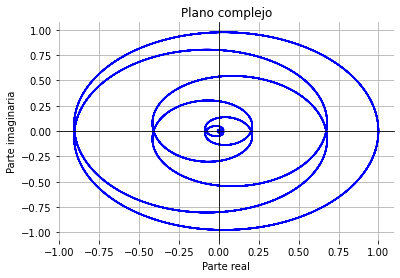

In [ ]:
p = Symbol('p',positive=True,bounded=True)
x = Symbol('x', real=True)
X = Bernoulli('X', p)
dpf = density(X)(x)

t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambdify(t,cf.subs(p,0.5),'numpy')

fig, ax = plt.subplots()
ax.plot((ϕ(np.linspace(-20,20,20000))**50).real,
        (ϕ(np.linspace(-20,20,20000))**50).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Suma de variables aleatorias Exponenciales

Sean $\{X_n\}_{n=1}^{50}$ variables aleatorias independientes con distribución $\mathrm{Exp}(3)$. Visualizemos la función característica de $\sum\limits_{n=1}^{50} X_n$.

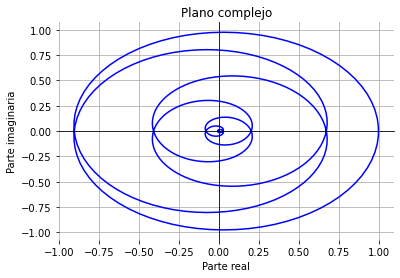

In [ ]:
X = Exponential('X', rate=3)
t = Symbol('t', positive=True)
cf = simplify(E(exp(I*t*X)))

ϕ=lambdify(t,cf,'numpy')

fig, ax = plt.subplots()
ax.plot((ϕ(np.linspace(-25,25,10000))**50).real,
        (ϕ(np.linspace(-25,25,10000))**50).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Suma de variables aleatorias Cauchy

Sean $\{X_n\}_{n=1}^{50}$ variables aleatorias independientes con distribución $\mathrm{Cauchy}(\gamma,x_0)$. Visualizemos la función característica de $\sum\limits_{n=1}^{50} X_n$.

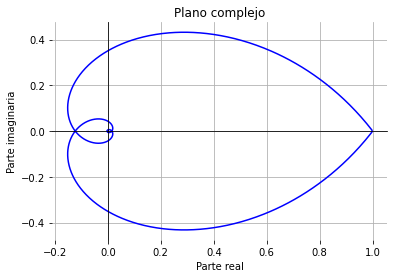

In [ ]:
x0=3
gamma=2
ϕ=lambda t: np.exp(x0*1j*t-gamma*np.abs(t))

fig, ax = plt.subplots()
ax.plot((ϕ(np.linspace(-25,25,1000000))**50).real,
        (ϕ(np.linspace(-25,25,1000000))**50).imag,'b-')

ax.set(xlabel='Parte real', ylabel='Parte imaginaria',
       title='Plano complejo')
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['top'].set_position('zero')

# turn off the top spine/ticks
ax.spines['bottom'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

Notemos que, en este caso, la función característica de la suma de variables aleatorias Cauchy no converge a la función característica de una variable aleatoria Normal, sino que sigue pareciendo Cauchy. La no convergencia de la suma de variables aleatorias Cauchy a una variable aleatoria normal no debe ser sorprendente, dado que las variables aleatorias Cauchy no cumplen con las hipótesis del teorema central del límite, pues la media y varianza (en general todos los momentos) no existen para la distribución Cauchy.